<a href="https://colab.research.google.com/github/SnowTrash/pyHikethroug/blob/main/Regression_DE_Practica_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#######################################################################################
#Differential Evolution (DE) Algorithm using Smart Sample Strategyes#
#Authors: # Jorge Galvez, UdG
#Modifier: # Juan López - 08/10/23
#######################################################################################

## Librerias

In [ ]:
pip install pyDOE

  Preparing metadata (setup.py) ... done
  Created wheel for pyDOE: filename=pyDOE-0.3.8-py3-none-any.whl size=18168 sha256=abbf305c393168ebcb1d66429d7de949cf80c1e52f06f02d555568586396cf94
  Stored in directory: /root/.cache/pip/wheels/ce/b6/d7/c6b64746dba6433c593e471e0ac3acf4f36040456d1d160d17
Successfully built pyDOE


In [ ]:
pip install sobol_seq

In [ ]:
pip install scipy

In [ ]:
pip install pyDOE2

  Preparing metadata (setup.py) ... done
  Created wheel for pyDOE2: filename=pyDOE2-1.3.0-py3-none-any.whl size=25521 sha256=c070b1a719aee9e5bae9ea1378dac34fb37271780dda082258082924321ac163
  Stored in directory: /root/.cache/pip/wheels/46/1f/29/6fda5c72f950841e39147ae603780ee913a62f977b4ad47ee4
Successfully built pyDOE2


In [ ]:
pip install pyswarm

  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4464 sha256=0aca127c792dee2c824484c7e79d94d42f7b28a07e4b8f70c8aa0065e967dc13
  Stored in directory: /root/.cache/pip/wheels/71/67/40/62fa158f497f942277cbab8199b05cb61c571ab324e67ad0d6
Successfully built pyswarm


In [ ]:
pip install matplotlib

# Main code

Running DE with LHS sampling...


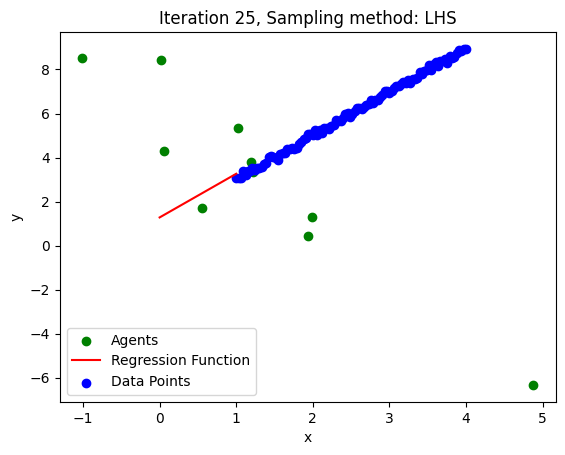

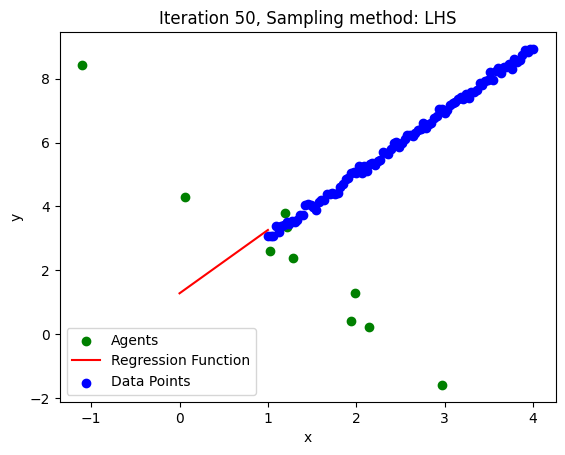

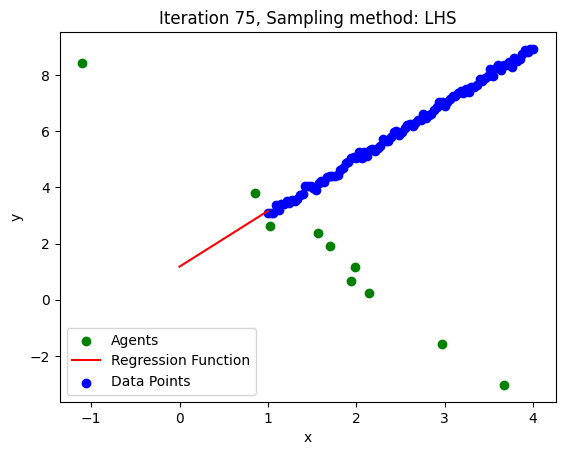

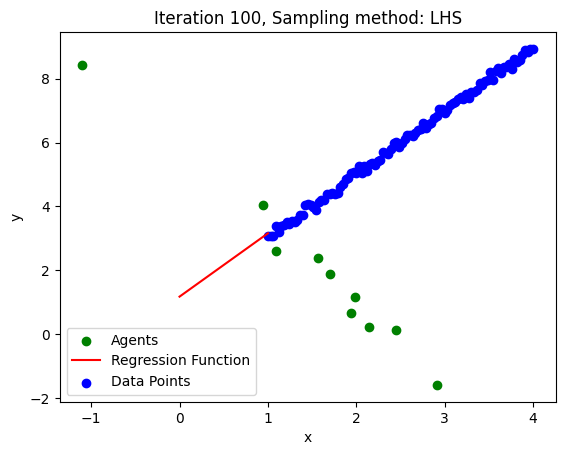

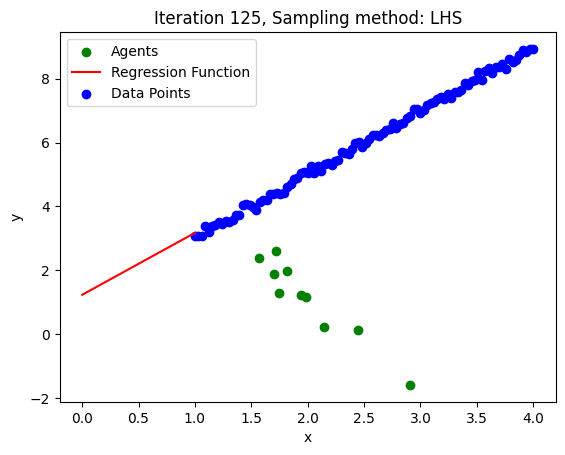

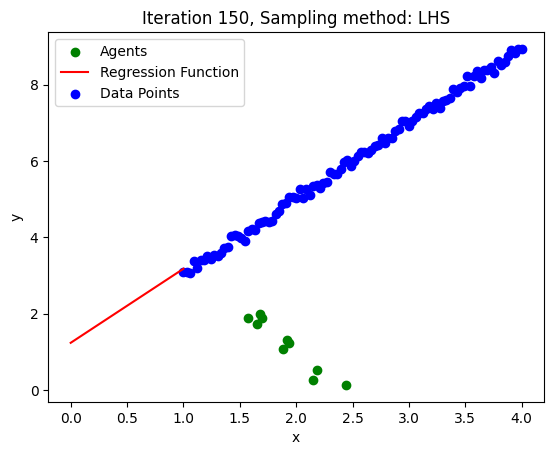

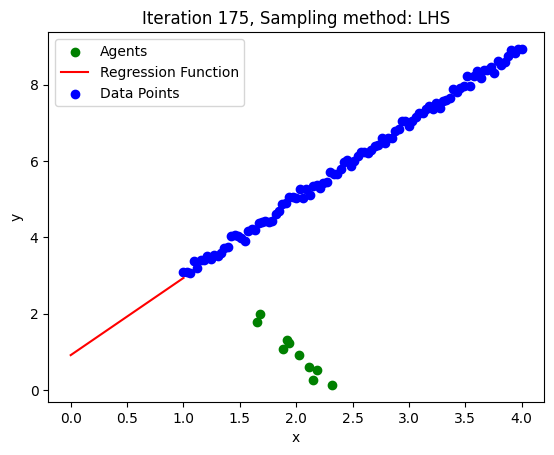

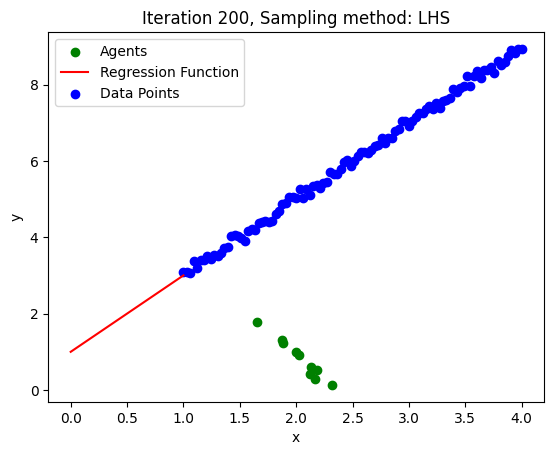

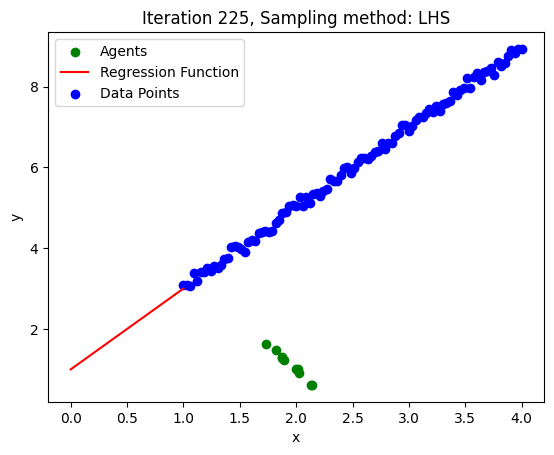

Iteration: 250


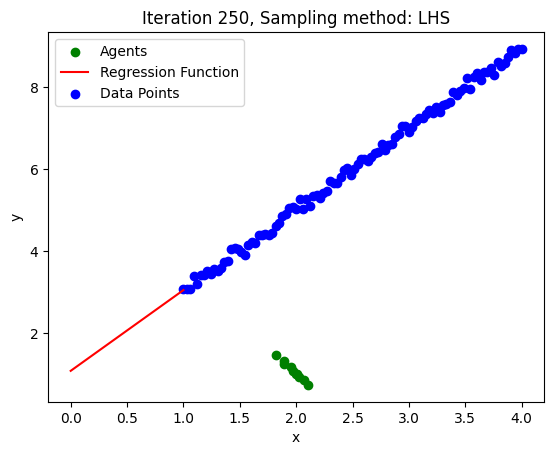

Iteration: 251


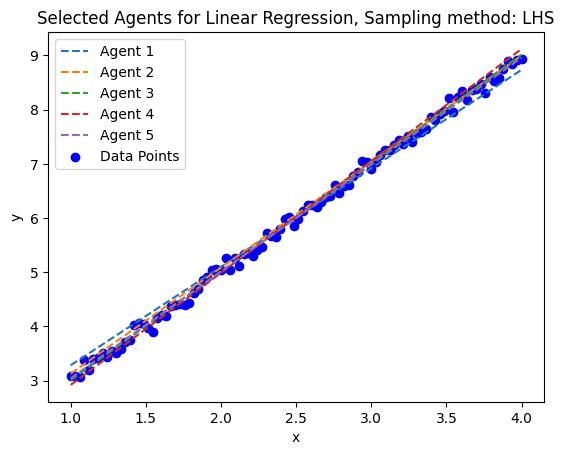

Running DE with Sobol sampling...


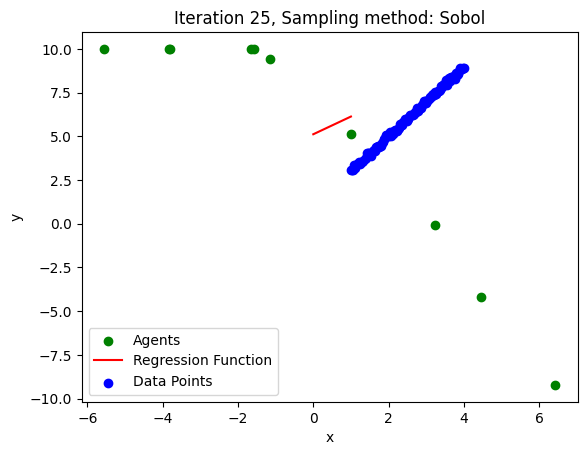

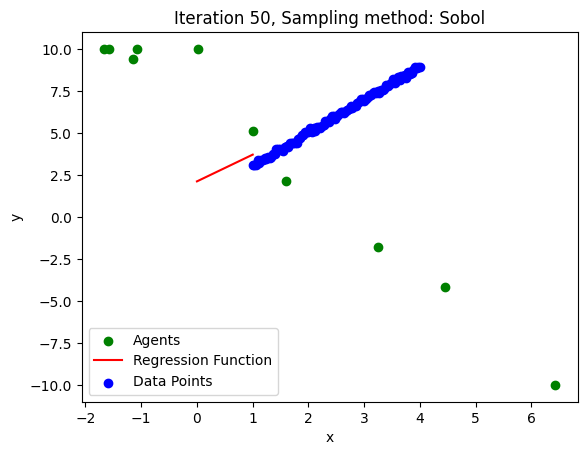

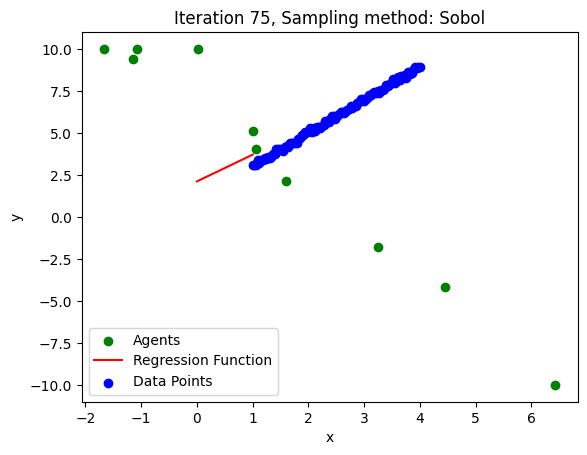

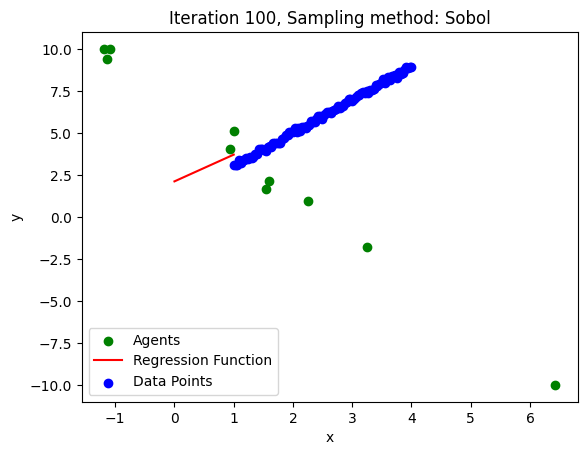

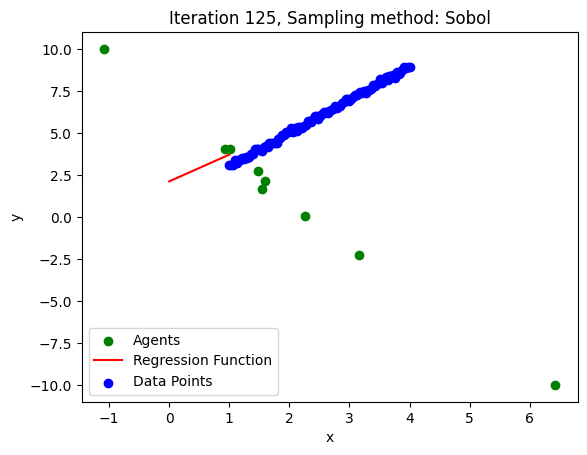

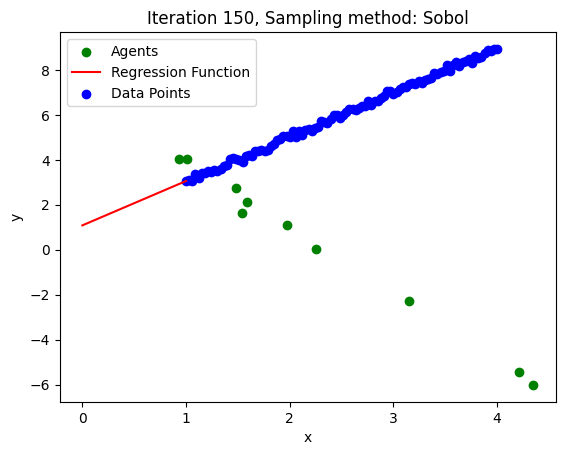

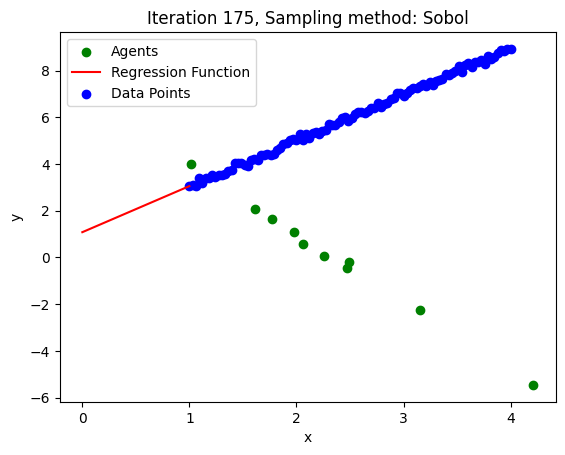

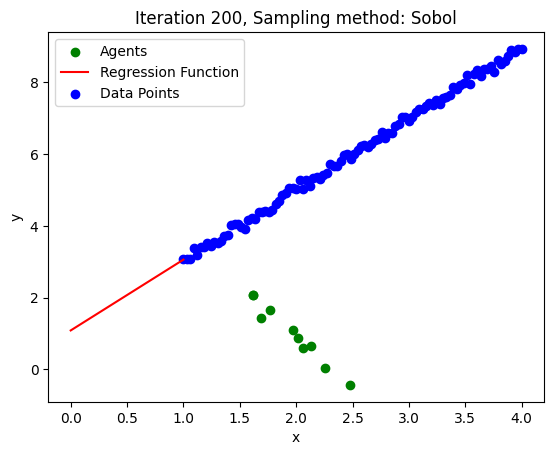

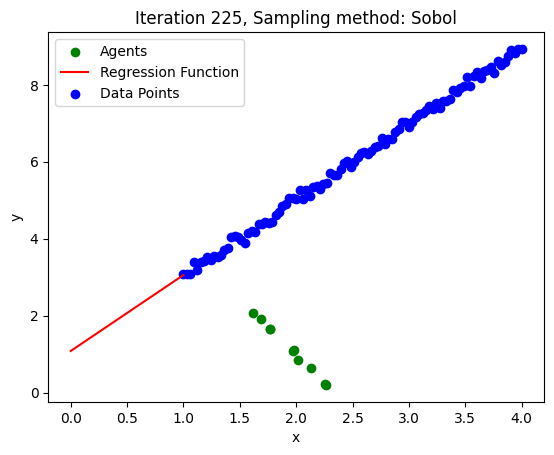

Iteration: 250


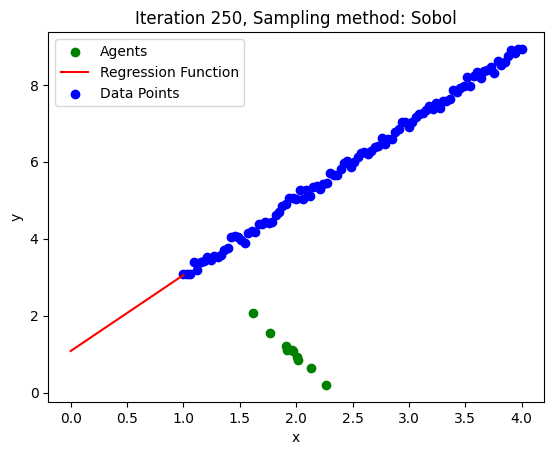

Iteration: 251


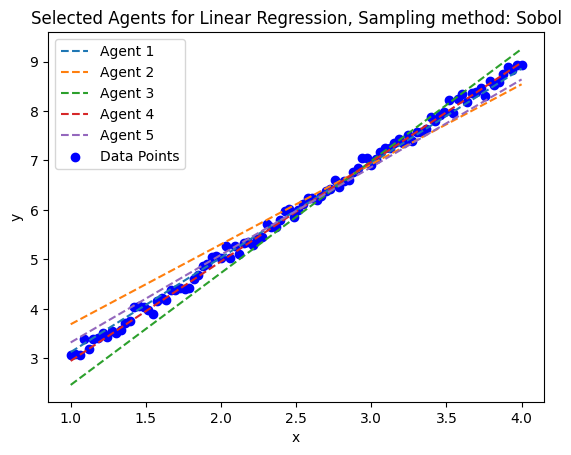

Running DE with Halton sampling...


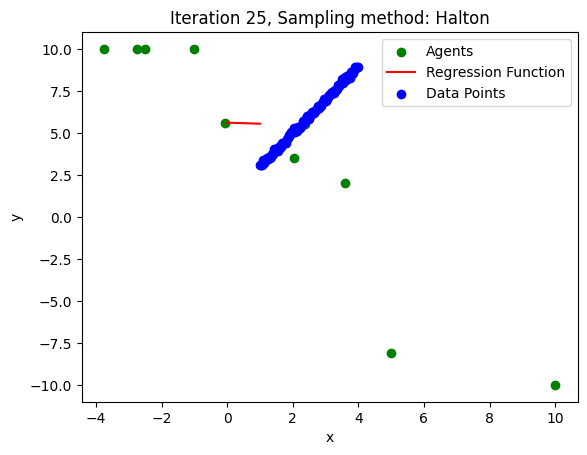

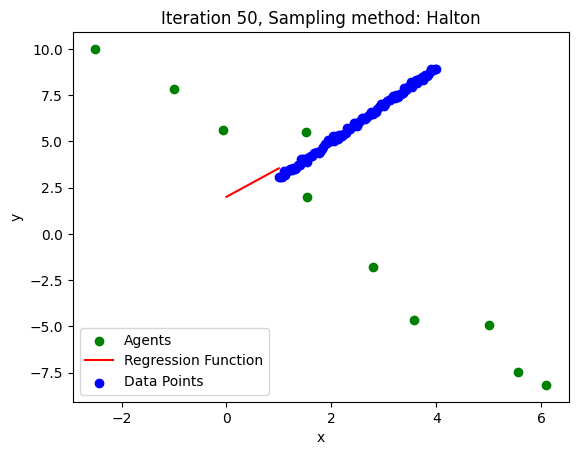

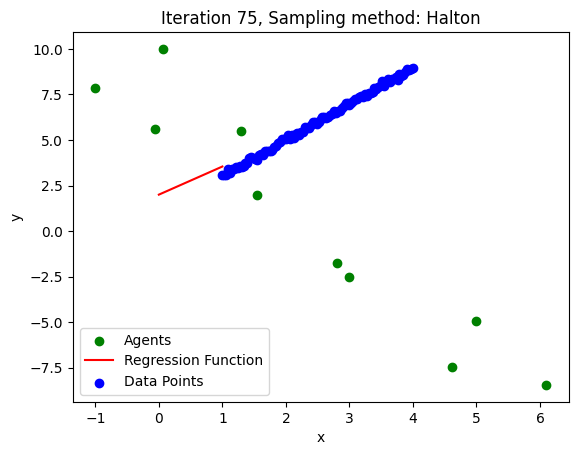

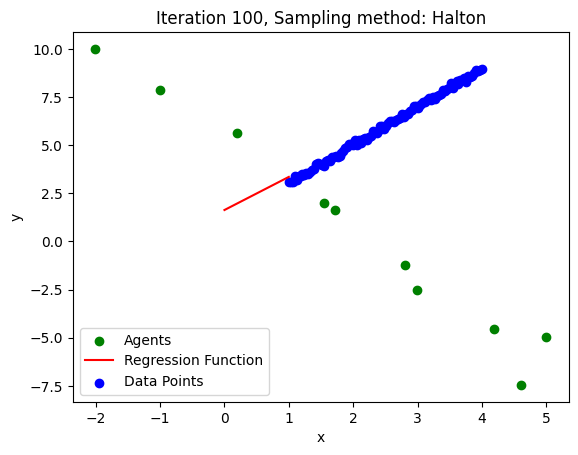

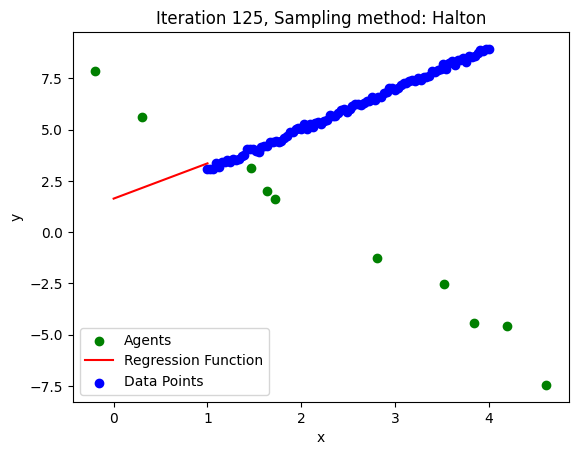

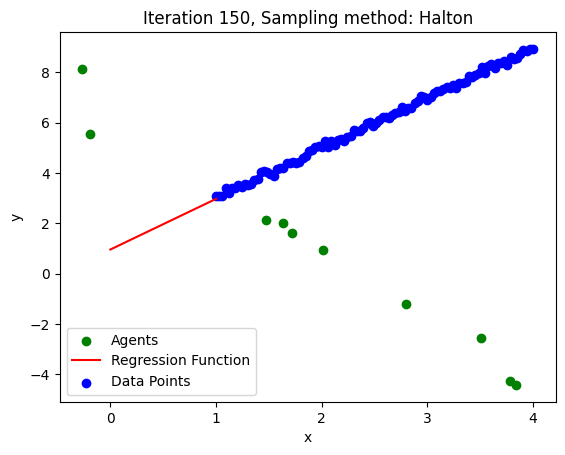

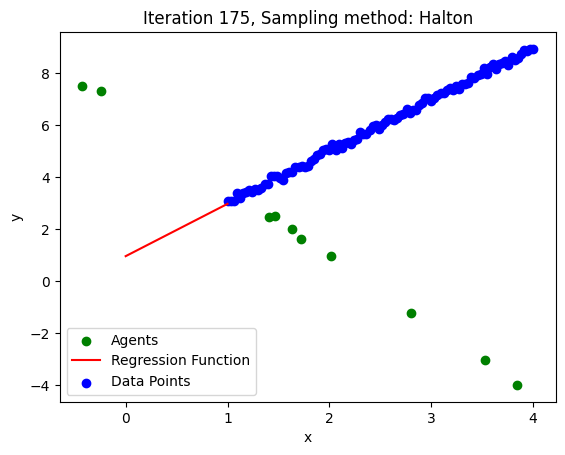

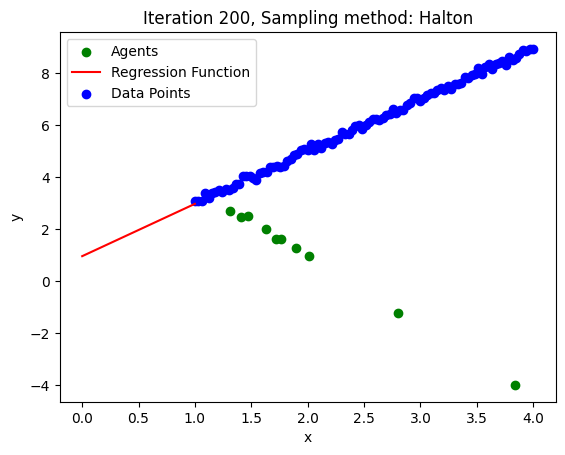

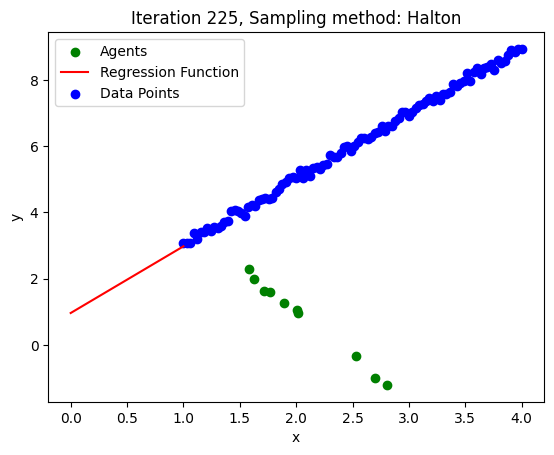

Iteration: 250


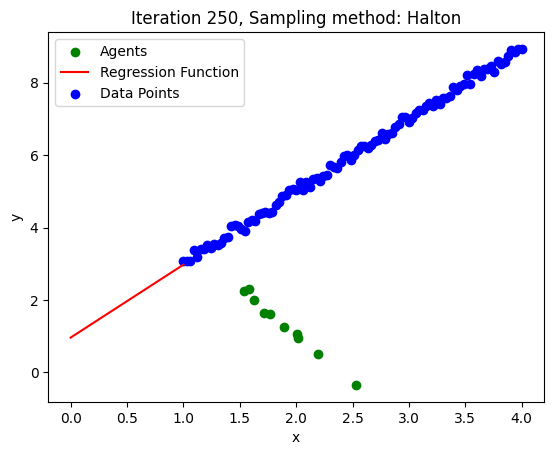

Iteration: 251


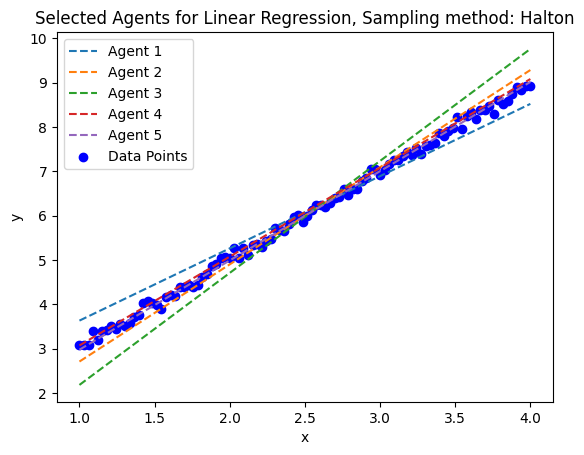

Running DE with UD sampling...


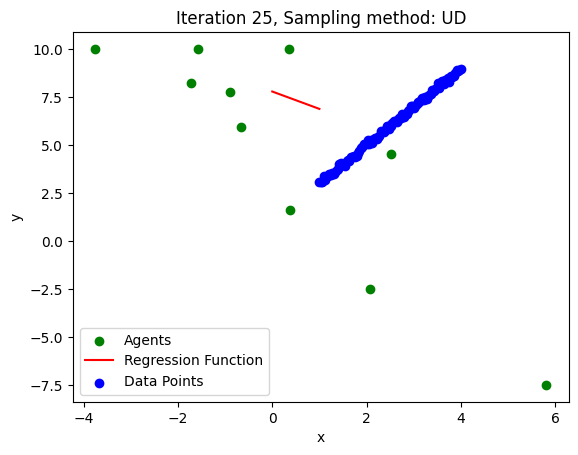

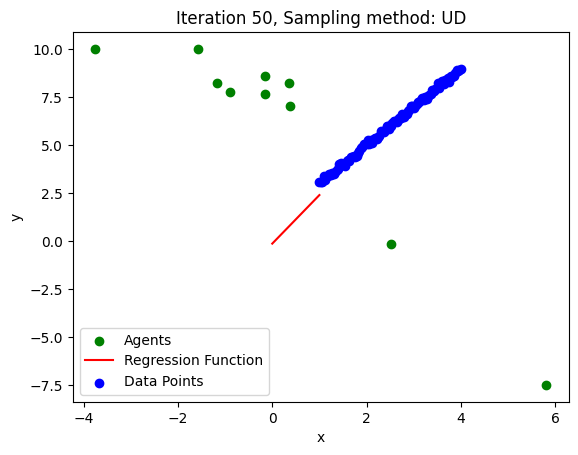

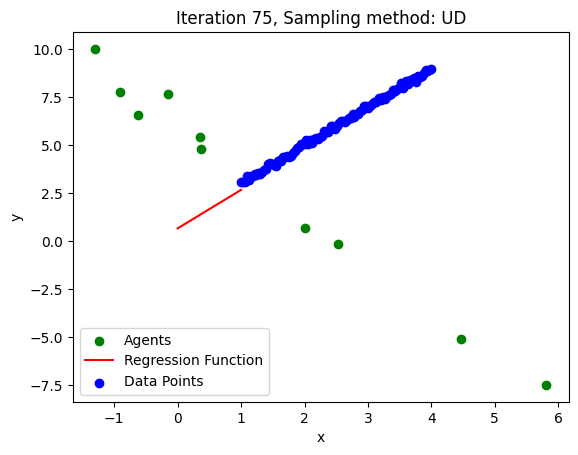

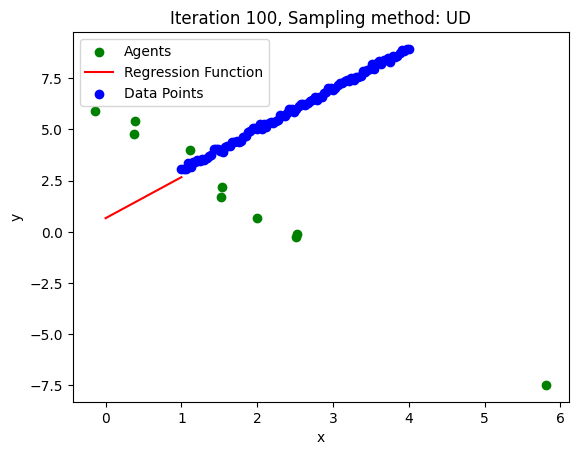

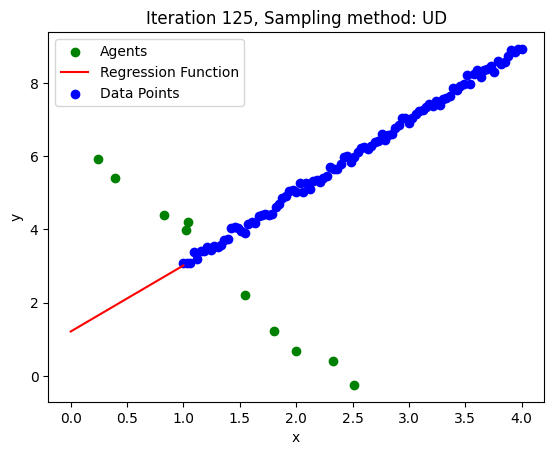

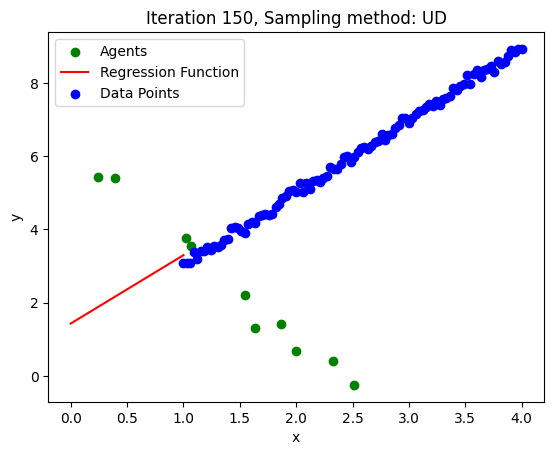

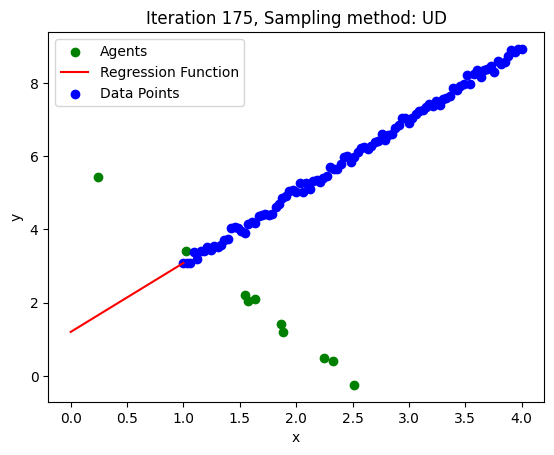

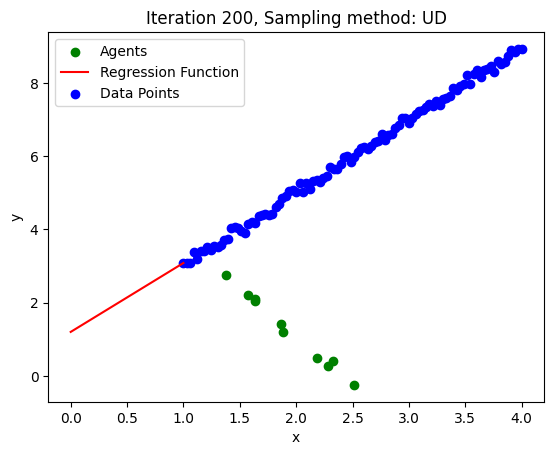

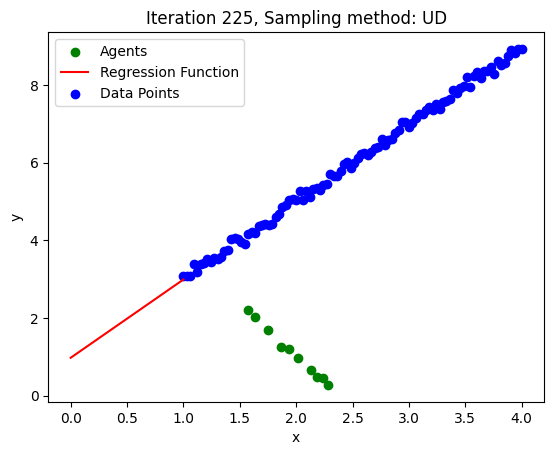

Iteration: 250


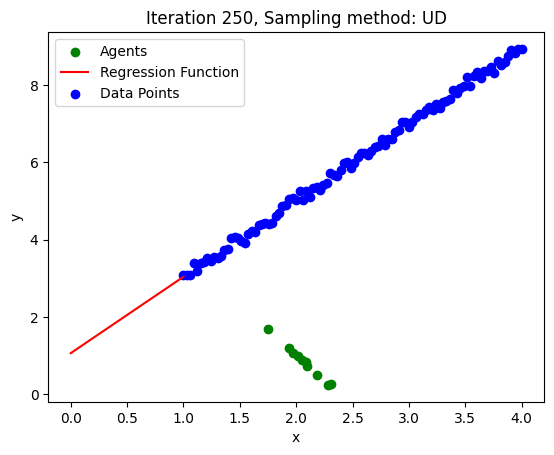

Iteration: 251


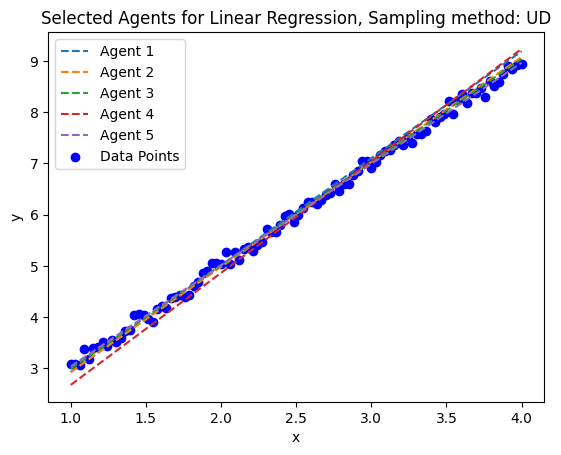

Running DE with Random sampling...


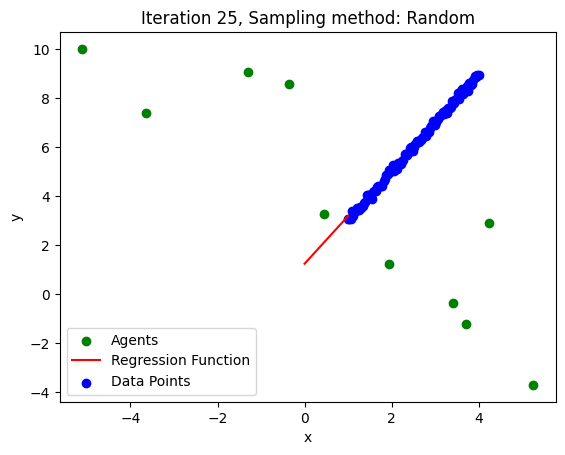

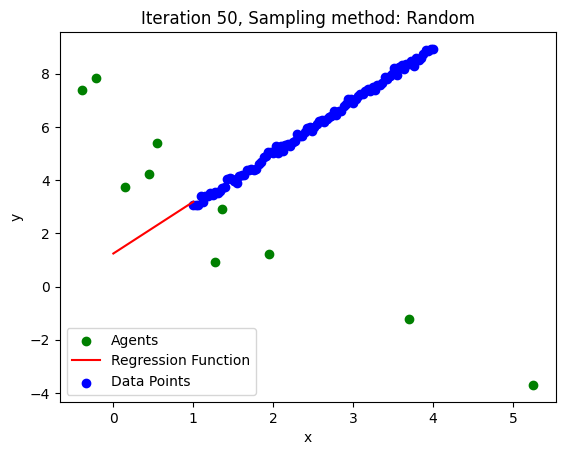

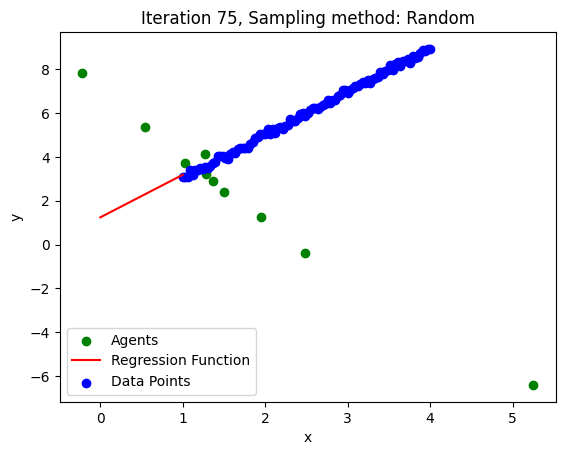

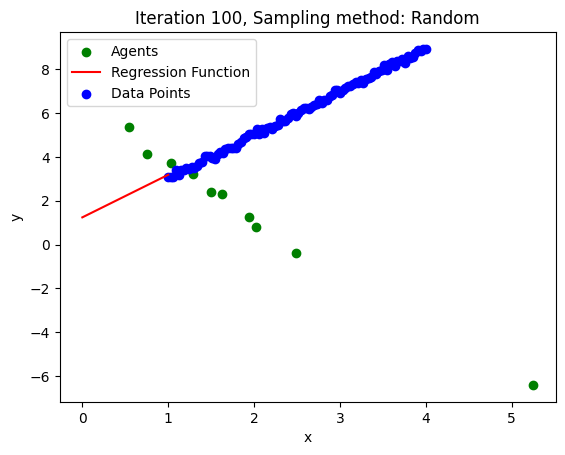

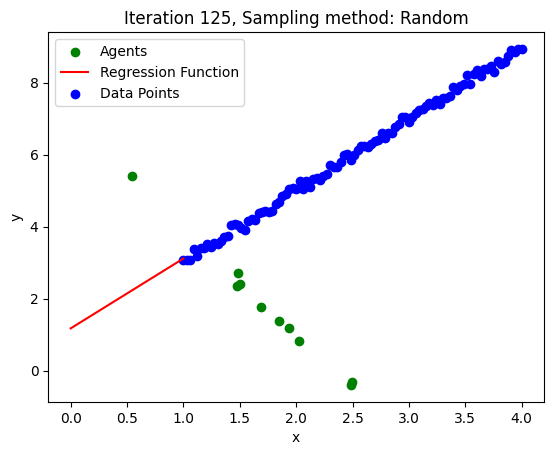

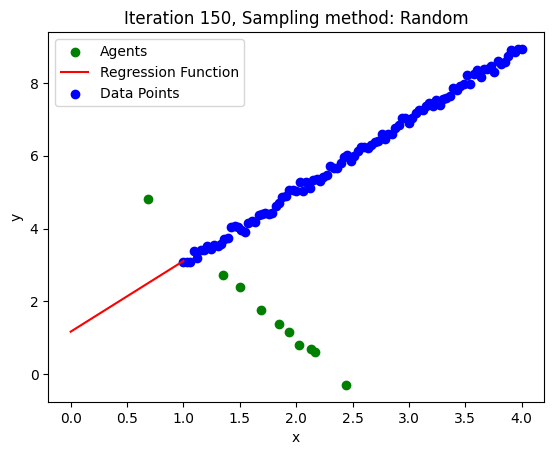

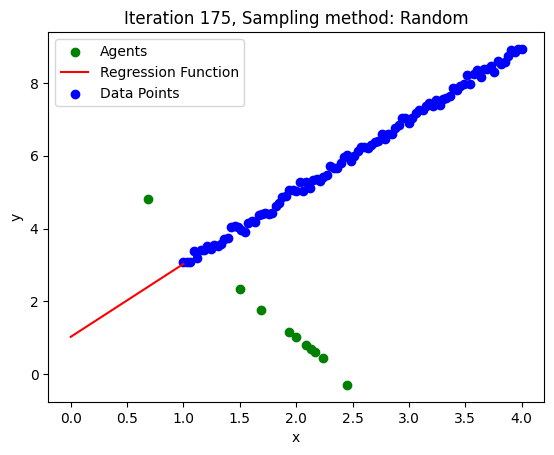

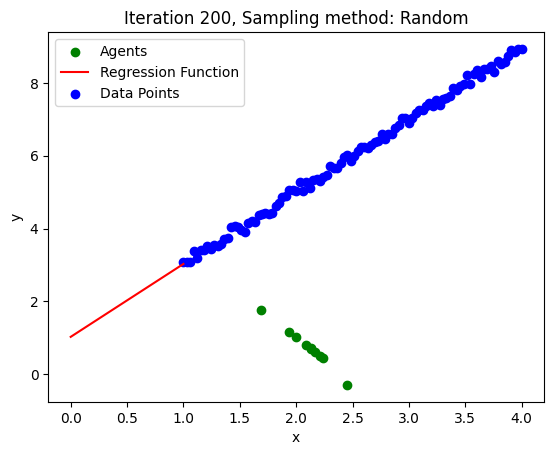

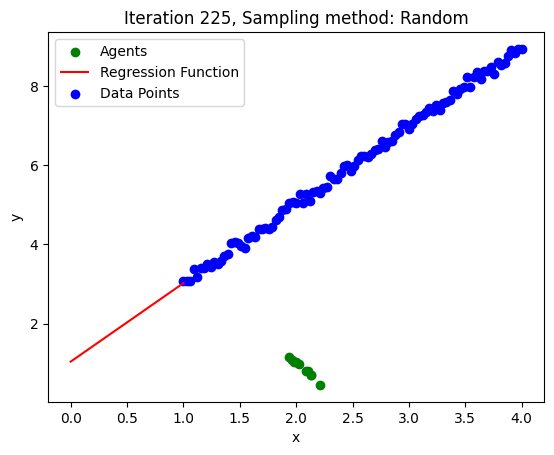

Iteration: 250


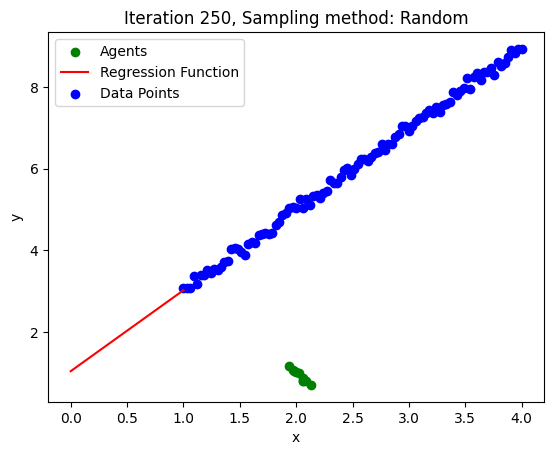

Iteration: 251


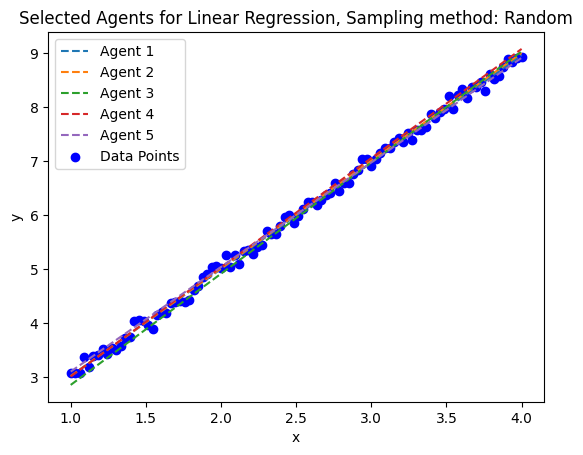

Running DE with CSFD sampling...


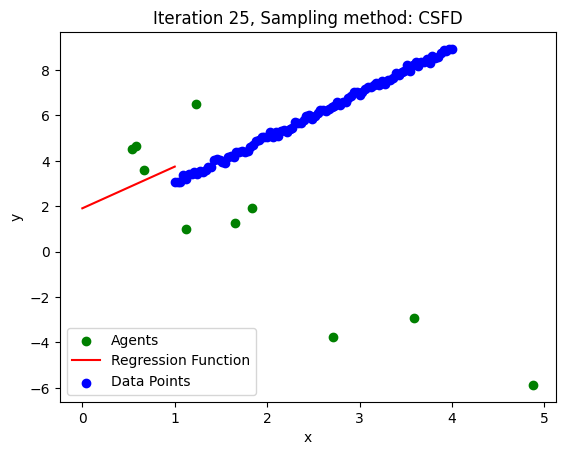

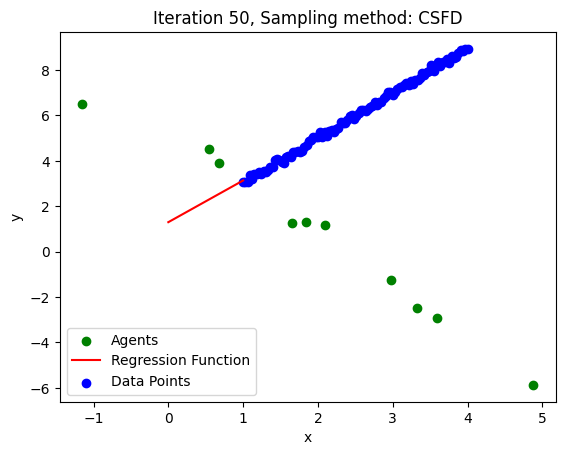

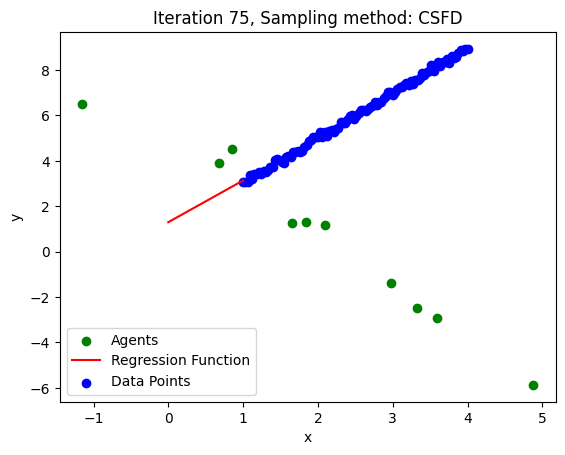

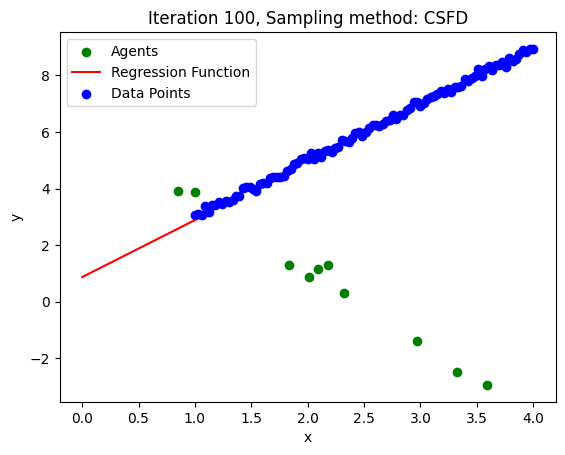

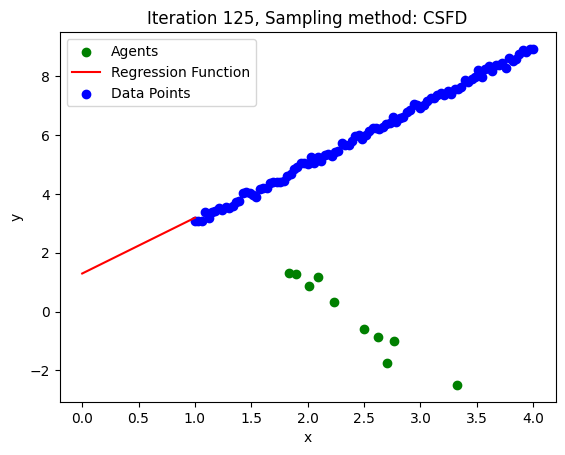

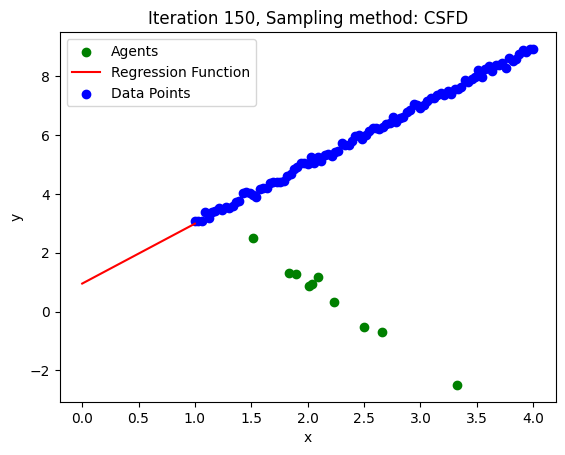

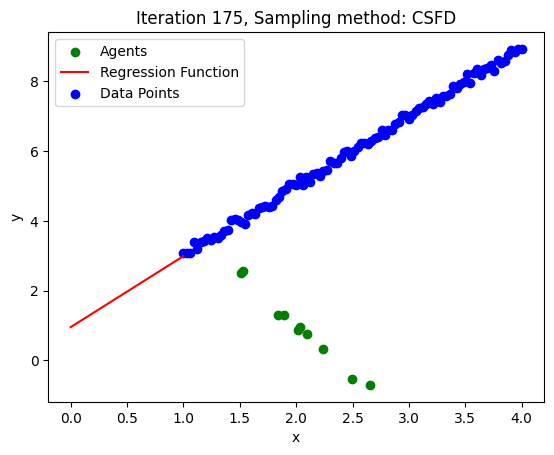

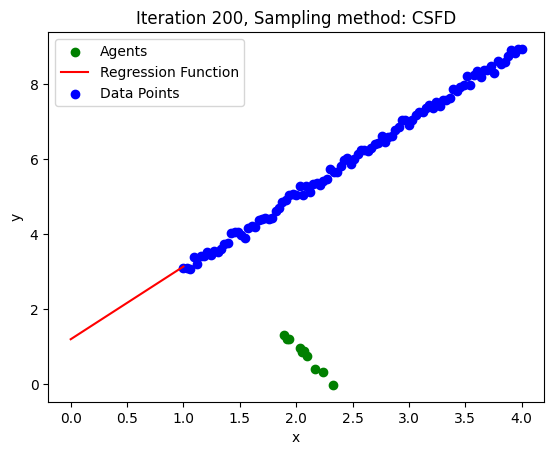

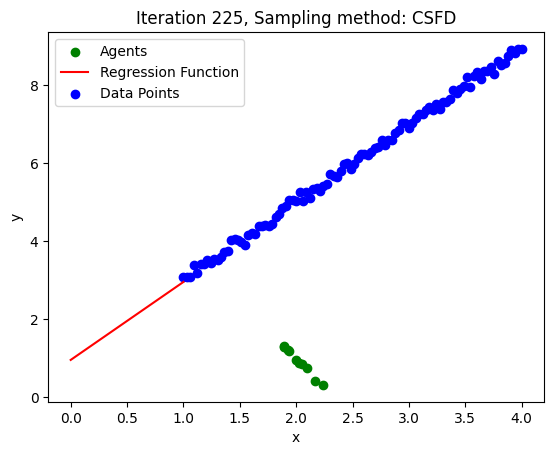

Iteration: 250


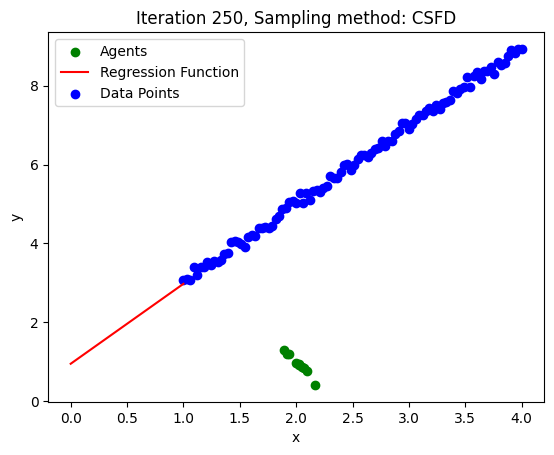

Iteration: 251


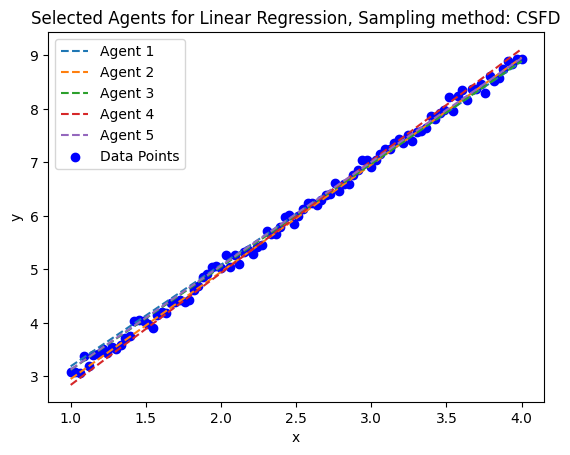


Best results for LHS:
Best parameters: [1.97163805 1.07164096]
Best MSE: 0.008192


Best results for Sobol:
Best parameters: [1.97453166 1.08248053]
Best MSE: 0.008445


Best results for Halton:
Best parameters: [2.01331771 0.96032   ]
Best MSE: 0.008626


Best results for UD:
Best parameters: [1.97570038 1.06218961]
Best MSE: 0.008112


Best results for Random:
Best parameters: [1.98109375 1.04447181]
Best MSE: 0.008060


Best results for CSFD:
Best parameters: [2.028387  0.9439134]
Best MSE: 0.009550

Best sampling technique based on MSE:
Sampling method: Random
Best parameters: [1.98109375 1.04447181]
Best MSE: 0.008060144998470666
Best sampling technique based on MSE:
Sampling method: Random
Best parameters: [1.98109375 1.04447181]
Best MSE: 0.008060144998470666


In [51]:
import numpy as np
import matplotlib.pyplot as plt
from pyDOE2 import lhs
from scipy.stats import qmc

# Define your regression dataset (a straight line with noise)
def generate_regression_data(num_points, noise_stddev=0.1):
    x = np.linspace(1, 4, num_points)
    y = 2 * x + 1 + np.random.normal(0, noise_stddev, num_points)
    return x, y

# The maximum number of iterations is established.
dimensions = 2

# The limits of the search space are defined.
t = np.array([-10, 10])  # Adjusted limits for the Ackley function
f_range = np.tile(t, (dimensions, 1))

# The maximum number of iterations is established.
max_iter = 250

# Create regression data
x, y = generate_regression_data(num_points=100, noise_stddev=0.1)

# Number of agents
num_agents = 10



# Function to initialize the population using different sampling techniques
def initialize_population(dimensions, f_range, num_agents, sampling_technique):
    if sampling_technique == "LHS":
        samples = lhs(dimensions, samples=num_agents, criterion="maximin", iterations=1000)
        agents = f_range[:, 0] + samples * (f_range[:, 1] - f_range[:, 0])
    elif sampling_technique == "Sobol":
        sobol_samples = qmc.Sobol(d=dimensions).random(num_agents)
        agents = f_range[:, 0] + sobol_samples * (f_range[:, 1] - f_range[:, 0])
    elif sampling_technique == "Halton":
        def halton_single(index, base):
            result = 0.0
            f = 1.0 / base
            i = index
            while i > 0:
                result += f * (i % base)
                i = int(i / base)
                f /= base
            return result

        agents = np.empty((num_agents, dimensions))
        for i in range(dimensions):
            sequence = np.zeros(num_agents)
            for j in range(num_agents):
                sequence[j] = halton_single(j + 1, 2 + i * 2)
            agents[:, i] = f_range[i, 0] + sequence * (f_range[i, 1] - f_range[i, 0])
    elif sampling_technique == "UD":
        ud_samples = qmc.LatinHypercube(d=dimensions).random(num_agents)
        agents = f_range[:, 0] + ud_samples * (f_range[:, 1] - f_range[:, 0])
    elif sampling_technique == "Random":
        agents = np.random.rand(num_agents, dimensions) * (f_range[:, 1] - f_range[:, 0]) + f_range[:, 0]
    elif sampling_technique == "CSFD":
        lhs_samples = lhs(dimensions, samples=num_agents, criterion="maximin", iterations=1000)
        centered_samples = lhs_samples - 0.5
        agents = f_range[:, 0] + centered_samples * (f_range[:, 1] - f_range[:, 0])
    else:
        raise ValueError("Invalid sampling technique")

    return agents


def differential_evolution(agents, max_iter, m, cross_p, plot_interval=25, technique=None):
    dimensions = agents.shape[1]
    num_agents = agents.shape[0]
    best_params = None
    best_mse = np.inf
    mse = np.empty(num_agents)
    fitness = np.empty(num_agents)

    x_reg = np.linspace(0, 1, 100)

    selected_agents = []  # Create a list to store selected agents in each iteration

    for i in range(num_agents):
        params = agents[i]
        y_pred = params[0] * x + params[1]
        mse[i] = np.mean((y - y_pred) ** 2)

        if mse[i] < best_mse:
            best_params = params
            best_mse = mse[i]

    iter = 1
    while iter <= max_iter:
        selected_agents_iteration = []  # List to store selected agents in this iteration
        for i in range(num_agents):
            # five different individuals are chosen.
            indexes = np.arange(num_agents)
            indexes = indexes[indexes != i]
            indexes = np.random.choice(indexes, 5, replace=False)
            agents_selected = agents[indexes]

            # The crossover operation is performed to obtain the mutant vector.
            mut = agents_selected[0] + m * (agents_selected[1] - agents_selected[2])

            # The differential mutation of the DE algorithm is performed.
            prob_vector = np.random.rand(dimensions) <= cross_p
            mut = agents[i] * prob_vector + mut * np.logical_not(prob_vector)

            # It is verified that the generated vector is within the search space defined by the upper and lower limits.
            for j in range(dimensions):
                upper_limit = f_range[j, 1]
                lower_limit = f_range[j, 0]

                if mut[j] < lower_limit:
                    mut[j] = lower_limit
                elif mut[j] > upper_limit:
                    mut[j] = upper_limit

            # Calculate the fitness of the mutant vector
            y_pred_mut = mut[0] * x + mut[1]  # Calculate predicted values for the mutant
            mse_mut = np.mean((y - y_pred_mut) ** 2)  # Calculate MSE for the mutant

            # The replacement mechanism is then performed.
            if mse_mut < mse[i]:
                agents[i] = mut
                mse[i] = mse_mut
                if mse[i] < best_mse:
                    best_params = agents[i]
                    best_mse = mse[i]

            # Check if this agent was selected for linear regression
            if i%2 == 0:
                selected_agents_iteration.append(agents[i])

        selected_agents.append(selected_agents_iteration)

# Visualize the agents' positions and the regression function at specific iterations
        if iter % plot_interval == 0:
            plt.figure()
            plt.scatter(agents[:, 0], agents[:, 1], label="Agents", color='green')
            y_reg = best_params[0] * x_reg + best_params[1]  # Update y_reg for current best_params
            plt.plot(x_reg, y_reg, label="Regression Function", color='red')
            plt.scatter(x, y, label="Data Points", color='blue')
            plt.title(f"Iteration {iter}, Sampling method: {technique}")
            plt.xlabel("x")
            plt.ylabel("y")
            plt.legend()
            plt.show()


        iter += 1
        if iter > 249:
            print("Iteration:", iter)

    return best_params, best_mse ,selected_agents


# List of sampling techniques to compare
sampling_techniques = ["LHS", "Sobol", "Halton", "UD", "Random", "CSFD"]

# Dictionary to store the results
results = {}

# Dictionary to store fitness values for each technique
fitness_values = {}

# Run DE for each sampling technique and store the results and selected agents
for technique in sampling_techniques:
    print(f"Running DE with {technique} sampling...")
    agents = initialize_population(dimensions, f_range, num_agents, technique)

    # default m and cross_p (0.5 , 0.2)
    best_params, best_mse, selected_agents = differential_evolution(agents, max_iter, 0.8, 0.8, technique=technique)
    results[technique] = (best_params, best_mse)

    # Store the fitness value
    fitness_values[technique] = best_mse

    # Retrieve the selected agents for the last iteration
    selected_agents_last_iteration = selected_agents[-1]

    # Create a plot for the selected agents
    plt.figure()
    for i, agent in enumerate(selected_agents_last_iteration):
        y_reg_selected = agent[0] * x + agent[1]
        plt.plot(x, y_reg_selected, label=f"Agent {i + 1}", linestyle='--')

    plt.scatter(x, y, label="Data Points", color='blue')
    plt.title(f"Selected Agents for Linear Regression, Sampling method: {technique}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()

# Print the best results for each sampling method
for method, result in results.items():
    print(f"\nBest results for {method}:")
    print(f"Best parameters: {result[0]}")
    print(f"Best MSE: {result[1]:.6f}\n")  # Format MSE with 6 decimal places

# Determine the "best technique" based on the lowest MSE value
best_technique = min(fitness_values, key=lambda k: fitness_values[k])
best_params = results[best_technique][0]
best_mse = results[best_technique][1]

# Print the best results
print("Best sampling technique based on MSE:")
print(f"Sampling method: {best_technique}")
print(f"Best parameters: {best_params}")
print(f"Best MSE: {best_mse}")

# Determine the "best technique" based on the lowest MSE value
best_technique = min(fitness_values, key=lambda k: fitness_values[k])
best_params = results[best_technique][0]
best_mse = results[best_technique][1]

# Print the best results
print("Best sampling technique based on MSE:")
print(f"Sampling method: {best_technique}")
print(f"Best parameters: {best_params}")
print(f"Best MSE: {best_mse}")